In [1]:
from fastai2.data.all import *
from nbdev.showdoc import show_doc

# Data block examples

> Examples for computer vision, NLP, and tabular

## Image classification

In [2]:
from fastai2.vision.all import *

### MNIST

In [3]:
torch.set_printoptions(threshold=400, linewidth=120)

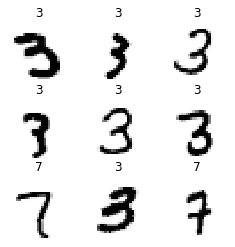

In [4]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dls = mnist.dataloaders(untar_data(URLs.MNIST_TINY,dest='/home/ubuntu/datasets/'))
dls.show_batch(max_n=9, figsize=(4,4))

In [5]:
mnist.summary(untar_data(URLs.MNIST_TINY))

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/ubuntu/.fastai/data/mnist_tiny/train/3/9797.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /home/ubuntu/.fastai/data/mnist_tiny/train/3/9797.png
    applying parent_label gives
      3
    applying Categorize gives
      TensorCategory(0)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(0))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(0))
    applying ToTensor gives
      (TensorImageBW of size 1x28x28, TensorCateg

### Pets

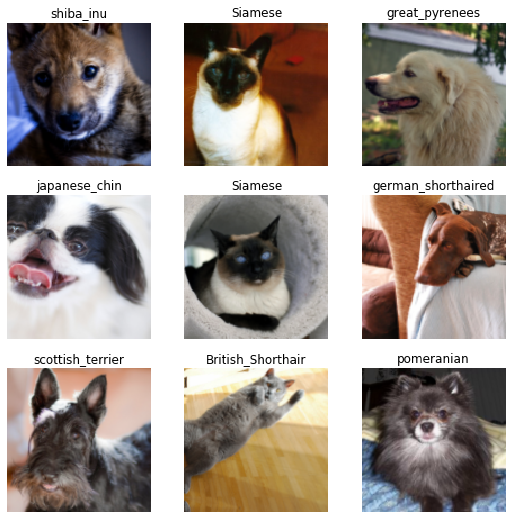

In [6]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=[attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')],
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms())

dls = pets.dataloaders(untar_data(URLs.PETS)/"images")
dls.show_batch(max_n=9)

### Multi-label - Planet

In [7]:
planet_source = untar_data(URLs.PLANET_TINY)
df = pd.read_csv(planet_source/"labels.csv")

In [8]:
planet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=ColReader(0, pref=planet_source/"train", suff='.jpg'),
                   splitter=RandomSplitter(),
                   get_y=ColReader(1, label_delim=' '),
                   batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

In [9]:
dls = planet.dataloaders(df.values)
dls.show_batch(max_n=9, figsize=(12,9))

KeyError: 'p'

In [10]:
planet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=lambda x:planet_source/"train"/f'{x[0]}.jpg',
                   splitter=RandomSplitter(),
                   get_y=lambda x:x[1].split(' '),
                   batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

dls = planet.dataloaders(df.values)
dls.show_batch(max_n=9, figsize=(12,9))

KeyError: 'c'

In [11]:
def _planet_items(x): return (
    f'{planet_source}/train/'+x.image_name+'.jpg', x.tags.str.split())

planet = DataBlock.from_columns(blocks=(ImageBlock, MultiCategoryBlock),
                   get_items = _planet_items,
                   splitter = RandomSplitter(),
                   batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

In [12]:
dls = planet.dataloaders(df)
dls.show_batch(max_n=9, figsize=(12,9))

KeyError: 'h'

In [ ]:
planet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = lambda o:f'{planet_source}/train/'+o.image_name+'.jpg',
                   get_y = lambda o:o.tags.split(),
                   splitter = RandomSplitter(),
                   batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

In [13]:
dls = planet.dataloaders(df)
dls.show_batch(max_n=9, figsize=(12,9))

KeyError: 'c'

## Image localization

### Segmentation

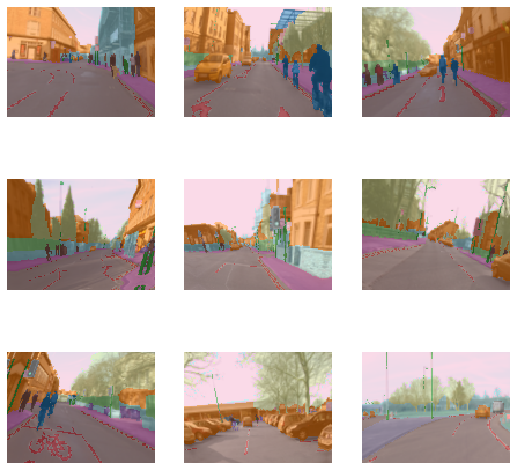

In [14]:
camvid = DataBlock(blocks=(ImageBlock, ImageBlock(cls=PILMask)),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: untar_data(URLs.CAMVID_TINY)/'labels'/f'{o.stem}_P{o.suffix}',
    batch_tfms=aug_transforms())

dls = camvid.dataloaders(untar_data(URLs.CAMVID_TINY)/"images")
dls.show_batch(max_n=9, vmin=1, vmax=30)

### Points

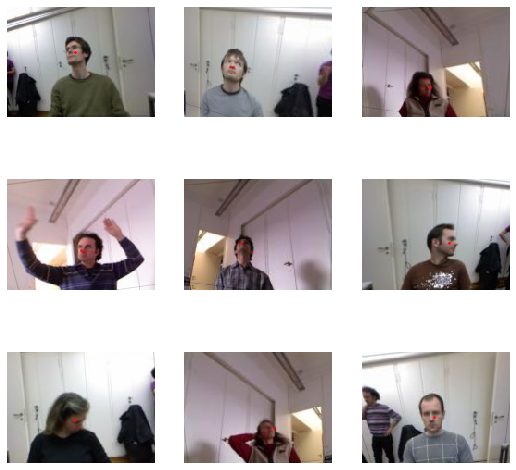

In [15]:
biwi_source = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = (biwi_source/'centers.pkl').load()

biwi = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=lambda o:fn2ctr[o.name].flip(0),
                 batch_tfms=aug_transforms())

dls = biwi.dataloaders(biwi_source)
dls.show_batch(max_n=9)

### Bounding boxes

In [16]:
coco_source = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco_source/'train.json')
img2bbox = dict(zip(images, lbl_bbox))

In [17]:
coco = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 getters=[noop, lambda o: img2bbox[o.name][0], lambda o: img2bbox[o.name][1]], 
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms(),
                 n_inp=1)

In [18]:
dls = coco.dataloaders(coco_source)
dls.show_batch(max_n=9)

Could not do one pass in your dataloader, there is something wrong in it


TypeError: clip_remove_empty() missing 1 required positional argument: 'label'

## Text

### Language model

In [ ]:
from fastai2.text.all import *

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv')

In [ ]:
imdb_lm = DataBlock(blocks=(TextBlock.from_df('text', is_lm=True),),
                    get_x=attrgetter('text'),
                    splitter=RandomSplitter())

In [ ]:
dls = imdb_lm.dataloaders(df, bs=64, seq_len=72)

In [ ]:
dls.show_batch(max_n=6)

,text,text_
0,"xxbos xxup before xxup the xxup devil xxup knows xxup you 're xxup dead starts off xxunk , setting up a simple heist that goes awry , told from varying perspectives ( in xxup xxunk style ) . xxmaj at around the hour mark , xxmaj sidney xxmaj lumet transforms this film into something that is so much more than the sum of its parts ; it eventually xxunk into a multi","xxup before xxup the xxup devil xxup knows xxup you 're xxup dead starts off xxunk , setting up a simple heist that goes awry , told from varying perspectives ( in xxup xxunk style ) . xxmaj at around the hour mark , xxmaj sidney xxmaj lumet transforms this film into something that is so much more than the sum of its parts ; it eventually xxunk into a multi -"
1,. xxmaj and he falls in love with a news xxunk by xxmaj marisa xxmaj xxunk ) . xxmaj there is a thing about the xxunk though . xxmaj xxunk is xxunk by her . xxmaj there is a scene where she is singing a song to him and afterwards he throws up . \n\n xxmaj the twist in the end of the film reveals kind of why . xxmaj the thing,xxmaj and he falls in love with a news xxunk by xxmaj marisa xxmaj xxunk ) . xxmaj there is a thing about the xxunk though . xxmaj xxunk is xxunk by her . xxmaj there is a scene where she is singing a song to him and afterwards he throws up . \n\n xxmaj the twist in the end of the film reveals kind of why . xxmaj the thing about
2,\n\n the two boys act like they are in a weird cult . they burn all there stuff . like play station games books dvds xxunk stuff school stuff . these two boys can be anybody your friends you brothers or the people you see walking down the street . it goes through there daily xxunk ( and that is making a gun . in the videos they make it mentions the,the two boys act like they are in a weird cult . they burn all there stuff . like play station games books dvds xxunk stuff school stuff . these two boys can be anybody your friends you brothers or the people you see walking down the street . it goes through there daily xxunk ( and that is making a gun . in the videos they make it mentions the bullying
3,"repeating his answers as if senile … \n\n a delight . \n\n xxmaj xxunk xxrep 6 r ! xxbos xxmaj recently , i had opportunity to view a working print in xxmaj kansas xxmaj city ( xxunk , xxup xxunk . ) of this title . xxmaj it is difficult for me , being a lover of the art as i am , to report the following , but , the truth","his answers as if senile … \n\n a delight . \n\n xxmaj xxunk xxrep 6 r ! xxbos xxmaj recently , i had opportunity to view a working print in xxmaj kansas xxmaj city ( xxunk , xxup xxunk . ) of this title . xxmaj it is difficult for me , being a lover of the art as i am , to report the following , but , the truth sometimes"
4,"gripping as xxmaj full xxmaj metal xxmaj jacket , not as epic as xxmaj band of xxmaj brothers , not as action packed as … well , anything . i certainly ca n't see why it was nominated for so much , nor why people are ' xxunk it up ' to these epic proportions . xxmaj mind you , given the calibre of movies in the last couple of years i","as xxmaj full xxmaj metal xxmaj jacket , not as epic as xxmaj band of xxmaj brothers , not as action packed as … well , anything . i certainly ca n't see why it was nominated for so much , nor why people are ' xxunk it up ' to these epic proportions . xxmaj mind you , given the calibre of movies in the last couple of years i suppose"
5,"looking for any originality in the plot structure or the minimal conflicts , you 'll be disappointed . xxmaj take away the zombies and you 'll have something just as melodramatic as a xxmaj beautiful xxmaj mind , xxunk on cheese . xxmaj this is the 6 / 10 . \n\n xxmaj however , the basic synopsis and idea is pretty original and over - the - top . xxmaj it 's","for any originality in the plot structure or the minimal conflicts , you 'll be disappointed . xxmaj take away the zombies and you 'll have something just as melodramatic as a xxmaj beautif

### Text classification

In [ ]:
imdb_clas = DataBlock(blocks=(TextBlock.from_df('text', vocab=dls.vocab), CategoryBlock),
                      get_x=attrgetter('text'),
                      get_y=attrgetter('label'),
                      splitter=RandomSplitter())

In [ ]:
dls = imdb_clas.dataloaders(df, bs=64, seq_len=72)

In [ ]:
dls.show_batch(max_n=2)

,text,category
0,"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain xxunk on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an xxunk storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is",negative
1,"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject , but xxmaj soderbergh 's most recent stinker , xxmaj the xxmaj girlfriend xxmaj xxunk ) , was also missing a story , so narrative ( and editing ? ) seem to suddenly be xxmaj soderbergh 's main challenge . xxmaj strange , after xxunk years in the business . xxmaj he was probably never much good at narrative , just xxunk it well inside "" edgy "" projects . \n\n xxmaj none of this excuses him this present , almost diabolical",negative


## Tabular data TODO

In [ ]:
from fastai2.tabular.core import *

In [ ]:
adult_source = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult_source/'adult.csv')

In [ ]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter()(range_of(df))

In [ ]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)

In [ ]:
dls = to.dataloaders()
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,age_na,fnlwgt_na,education-num_na,age,fnlwgt,education-num,salary
0,Private,Masters,Never-married,Exec-managerial,Not-in-family,White,False,False,False,41.000000,195123.999850,14.0,<50k
1,Self-emp-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,False,False,False,31.000000,256361.998085,13.0,<50k
2,Local-gov,Some-college,Never-married,Adm-clerical,Not-in-family,White,False,False,False,21.000000,193130.000005,10.0,<50k
3,Private,Assoc-acdm,Never-married,Adm-clerical,Not-in-family,White,False,False,False,51.000000,24343.994880,12.0,<50k
4,Private,11th,Never-married,Other-service,Own-child,White,False,False,False,16.999999,270586.997573,7.0,<50k
5,Private,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,False,False,False,31.000000,246438.999775,10.0,>=50k
6,Private,Some-college,Separated,Adm-clerical,Unmarried,White,False,False,False,33.000000,180551.000315,10.0,<50k
7,Private,Some-college,Divorced,Machine-op-inspct,Not-in-family,White,False,False,False,37.000000,211154.000030,10.0,<50k
8,Private,Bachelors,Married-spouse-absent,Other-service,Other-relative,Black,False,False,False,52.000000,82285.003867,13.0,<50k
9,Private,Some-college,Divorced,Exec-managerial,Not-in-family,White,False,False,False,36.000000,130588.996883,10.0,<50k
